## Project :- Analyzing the trends of COVID-19 with Python.

## Problem Statement :- Given data about COVID 19 patients, write code to visualize the impact and analyze the trend of rate of infection and recovery as well as make predictions about the number of cases expected a week in future based on the current trends.

## Time series :- Forecasting Covid-19 cases data.
## Models :-  AR,MA,ARIMA,SARIMAX and so on.
## We are going to use one model, i.e fbprophet model (NEW MODEL)

##   

## Importing Essential Libraries:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Reading The file:

In [4]:
df= pd.read_csv('covid_19_clean_complete (11) (1).csv')

In [5]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


## Exploratory Data Analysis Starts:

### Checking Shape, Renaming and exploring various Information of the Data-set -

In [6]:
# renaming the columns for my convenience of analysis:
df.rename(columns={'Province/State':'province','Lat':'lat','Long':'long','Date':'date','Confirmed':'confirmed','Deaths':'deaths','Recovered':'recovered','Active':'active'})

,province,Country/Region,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [7]:
df=df.rename(columns={'Province/State':'province','Lat':'lat','Long':'long','Date':'date','Confirmed':'confirmed','Deaths':'deaths','Recovered':'recovered','Active':'active'})

In [8]:
df.head()

,province,Country/Region,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province        14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   lat             49068 non-null  float64
 3   long            49068 non-null  float64
 4   date            49068 non-null  object 
 5   confirmed       49068 non-null  int64  
 6   deaths          49068 non-null  int64  
 7   recovered       49068 non-null  int64  
 8   active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [10]:
# checking the last date in my data-set when any observation has been recorded:
df.tail(60)

,province,Country/Region,lat,long,date,confirmed,deaths,recovered,active,WHO Region
49008,NaN,Sudan,12.862800,30.217600,2020-07-27,11424,720,5939,4765,Eastern Mediterranean
49009,NaN,Suriname,3.919300,-56.027800,2020-07-27,1483,24,925,534,Americas
49010,NaN,Sweden,60.128161,18.643501,2020-07-27,79395,5700,0,73695,Europe
49011,NaN,Switzerland,46.818200,8.227500,2020-07-27,34477,1978,30900,1599,Europe
49012,NaN,Taiwan*,23.700000,121.000000,2020-07-27,462,7,440,15,Western Pacific
49013,NaN,Tanzania,-6.369028,34.888822,2020-07-27,509,21,183,305,Africa
49014,NaN,Thailand,15.870032,100.992541,2020-07-27,3297,58,3111,128,South-East Asia
49015,NaN,Togo,8.619500,0.824800,2020-07-27,874,18,607,249,Africa
49016,NaN,Trinidad and Tobago,10.691800,-61.222500,2020-07-27,148,8,128,12,Americas
49017,NaN,Tunisia,33.886917,9.537499,2020-07-27,1455,50,1157,248,Eastern Mediterranean


In [11]:
df.shape

(49068, 10)

In [12]:
df['date'].max() # last date of record

'2020-07-27'

In [13]:
df['date'].min() # first date of record

'2020-01-22'

In [14]:
# filtration of the rows based on the last date:
top=df[df['date']=='2020-07-27']

In [15]:
top

,province,Country/Region,lat,long,date,confirmed,deaths,recovered,active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [16]:
# Wanting to see confirmed cases, deaths ,recovered and active cases on 2020-07-27 of each country/region:
country_last=top.groupby('Country/Region')['confirmed','deaths','recovered','active'].sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_2600\3157079739.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  country_last=top.groupby('Country/Region')['confirmed','deaths','recovered','active'].sum()


In [17]:
top

,province,Country/Region,lat,long,date,confirmed,deaths,recovered,active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [18]:
country_last.head()

,confirmed,deaths,recovered,active
Country/Region,,,,
Afghanistan,36263,1269,25198,9796
Albania,4880,144,2745,1991
Algeria,27973,1163,18837,7973
Andorra,907,52,803,52
Angola,950,41,242,667


In [19]:
country_last['confirmed'].value_counts()

24        2
86        2
10621     2
109597    1
9132      1
         ..
1137      1
207112    1
33624     1
4227      1
2704      1
Name: confirmed, Length: 184, dtype: int64

In [20]:
top['Country/Region'].value_counts()

China             33
Canada            12
France            11
United Kingdom    11
Australia          8
                  ..
Holy See           1
Honduras           1
Hungary            1
Iceland            1
Lesotho            1
Name: Country/Region, Length: 187, dtype: int64

In [21]:
# total confirmed cases on each dates taking the whole world together:
total_cases= df.groupby('date')['date','confirmed'].sum().reset_index()

C:\Users\HP\AppData\Local\Temp\ipykernel_2600\967455084.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_cases= df.groupby('date')['date','confirmed'].sum().reset_index() # behtorey multiple columns niley tobey giye data-frame formatey output debey....naley array formatey daye.resetindex diley index gulo ferot peye jabo.


In [22]:
total_cases

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [23]:
total_cases['confirmed'].value_counts()

555         1
6077978     1
5110064     1
5216964     1
5322253     1
           ..
538666      1
603066      1
670723      1
730300      1
16480485    1
Name: confirmed, Length: 188, dtype: int64

In [24]:
total_cases['date']= pd.to_datetime(total_cases['date']) # converting the date column to datetime data-type.

In [25]:
total_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       188 non-null    datetime64[ns]
 1   confirmed  188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [26]:
total_cases.head()

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


## Visualization:

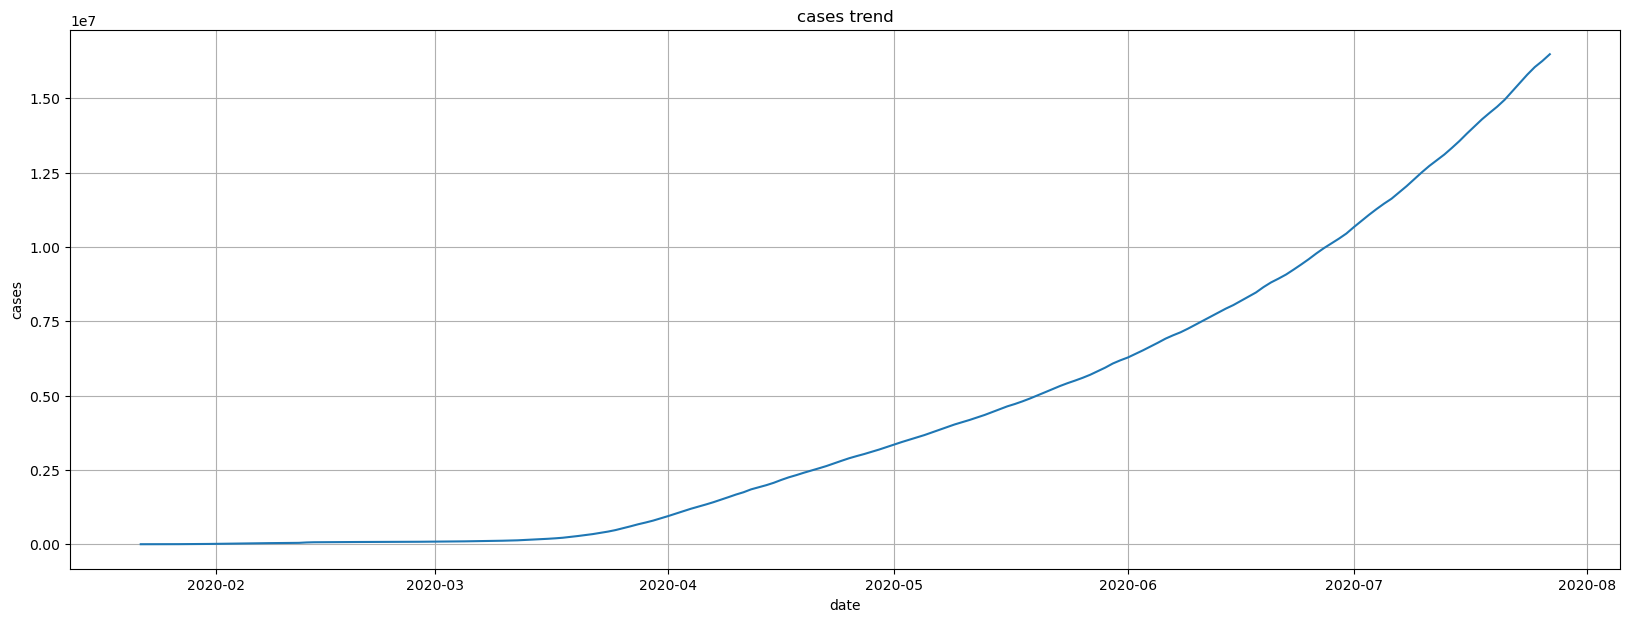

In [28]:
plt.figure(figsize=(20,7))
plt.plot(total_cases['date'],total_cases['confirmed'])
plt.xlabel('date')
plt.ylabel('cases')
plt.title('cases trend')
plt.grid(True)

plt.show()


In [29]:
# top 20 countries with highest number of actives cases for the latest data 27th july 2020

top_actives = top.groupby(by="Country/Region")["active"].sum().sort_values(ascending=False).reset_index()
top_actives

,Country/Region,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
...,...,...
182,Holy See,0
183,San Marino,0
184,Brunei,0
185,Dominica,0


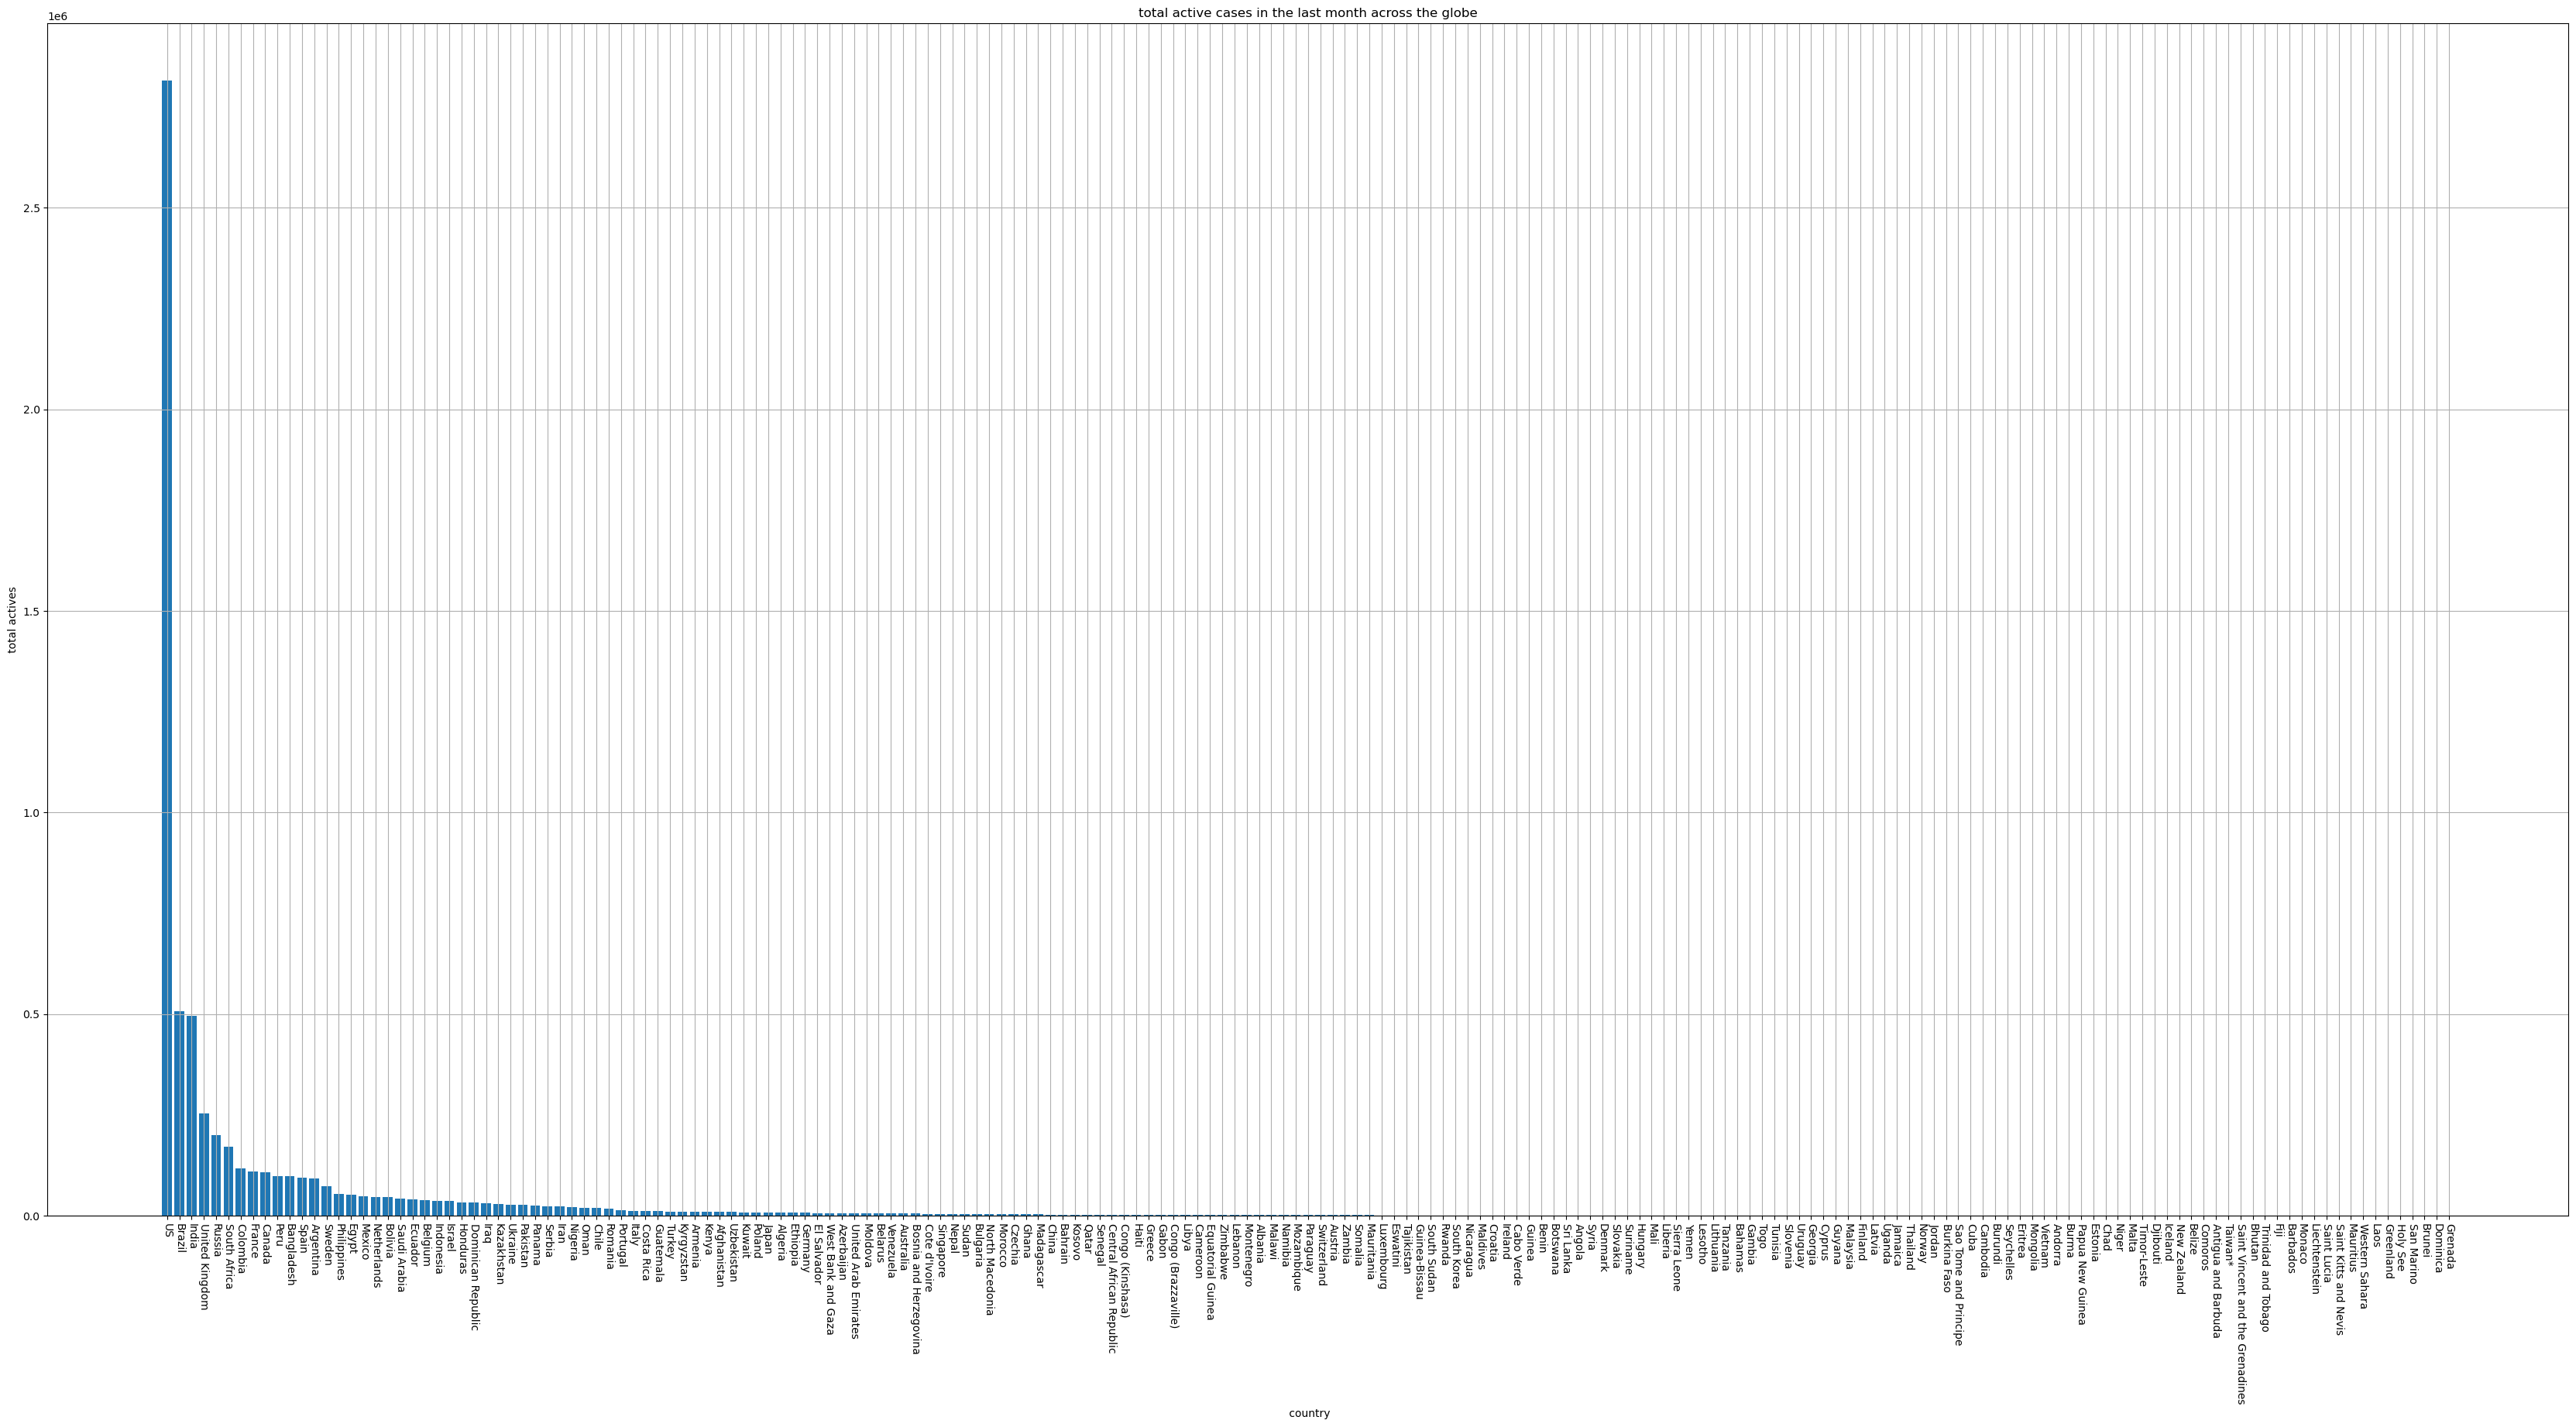

In [30]:
plt.figure(figsize=(42,20))
plt.bar(top_actives['Country/Region'],top_actives['active'])
plt.xlabel(' country')
plt.ylabel('total actives')
plt.title('total active cases in the last month across the globe')
plt.xticks(rotation=270)
plt.grid(True)

plt.show()

In [31]:
# top  countries with highest number of Death cases for the latest data 27th july 2020

top_deaths = top.groupby(by="Country/Region")["deaths"].sum().sort_values(ascending=False).reset_index()
top_deaths

,Country/Region,deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
...,...,...
182,Laos,0
183,Greenland,0
184,Cambodia,0
185,Grenada,0


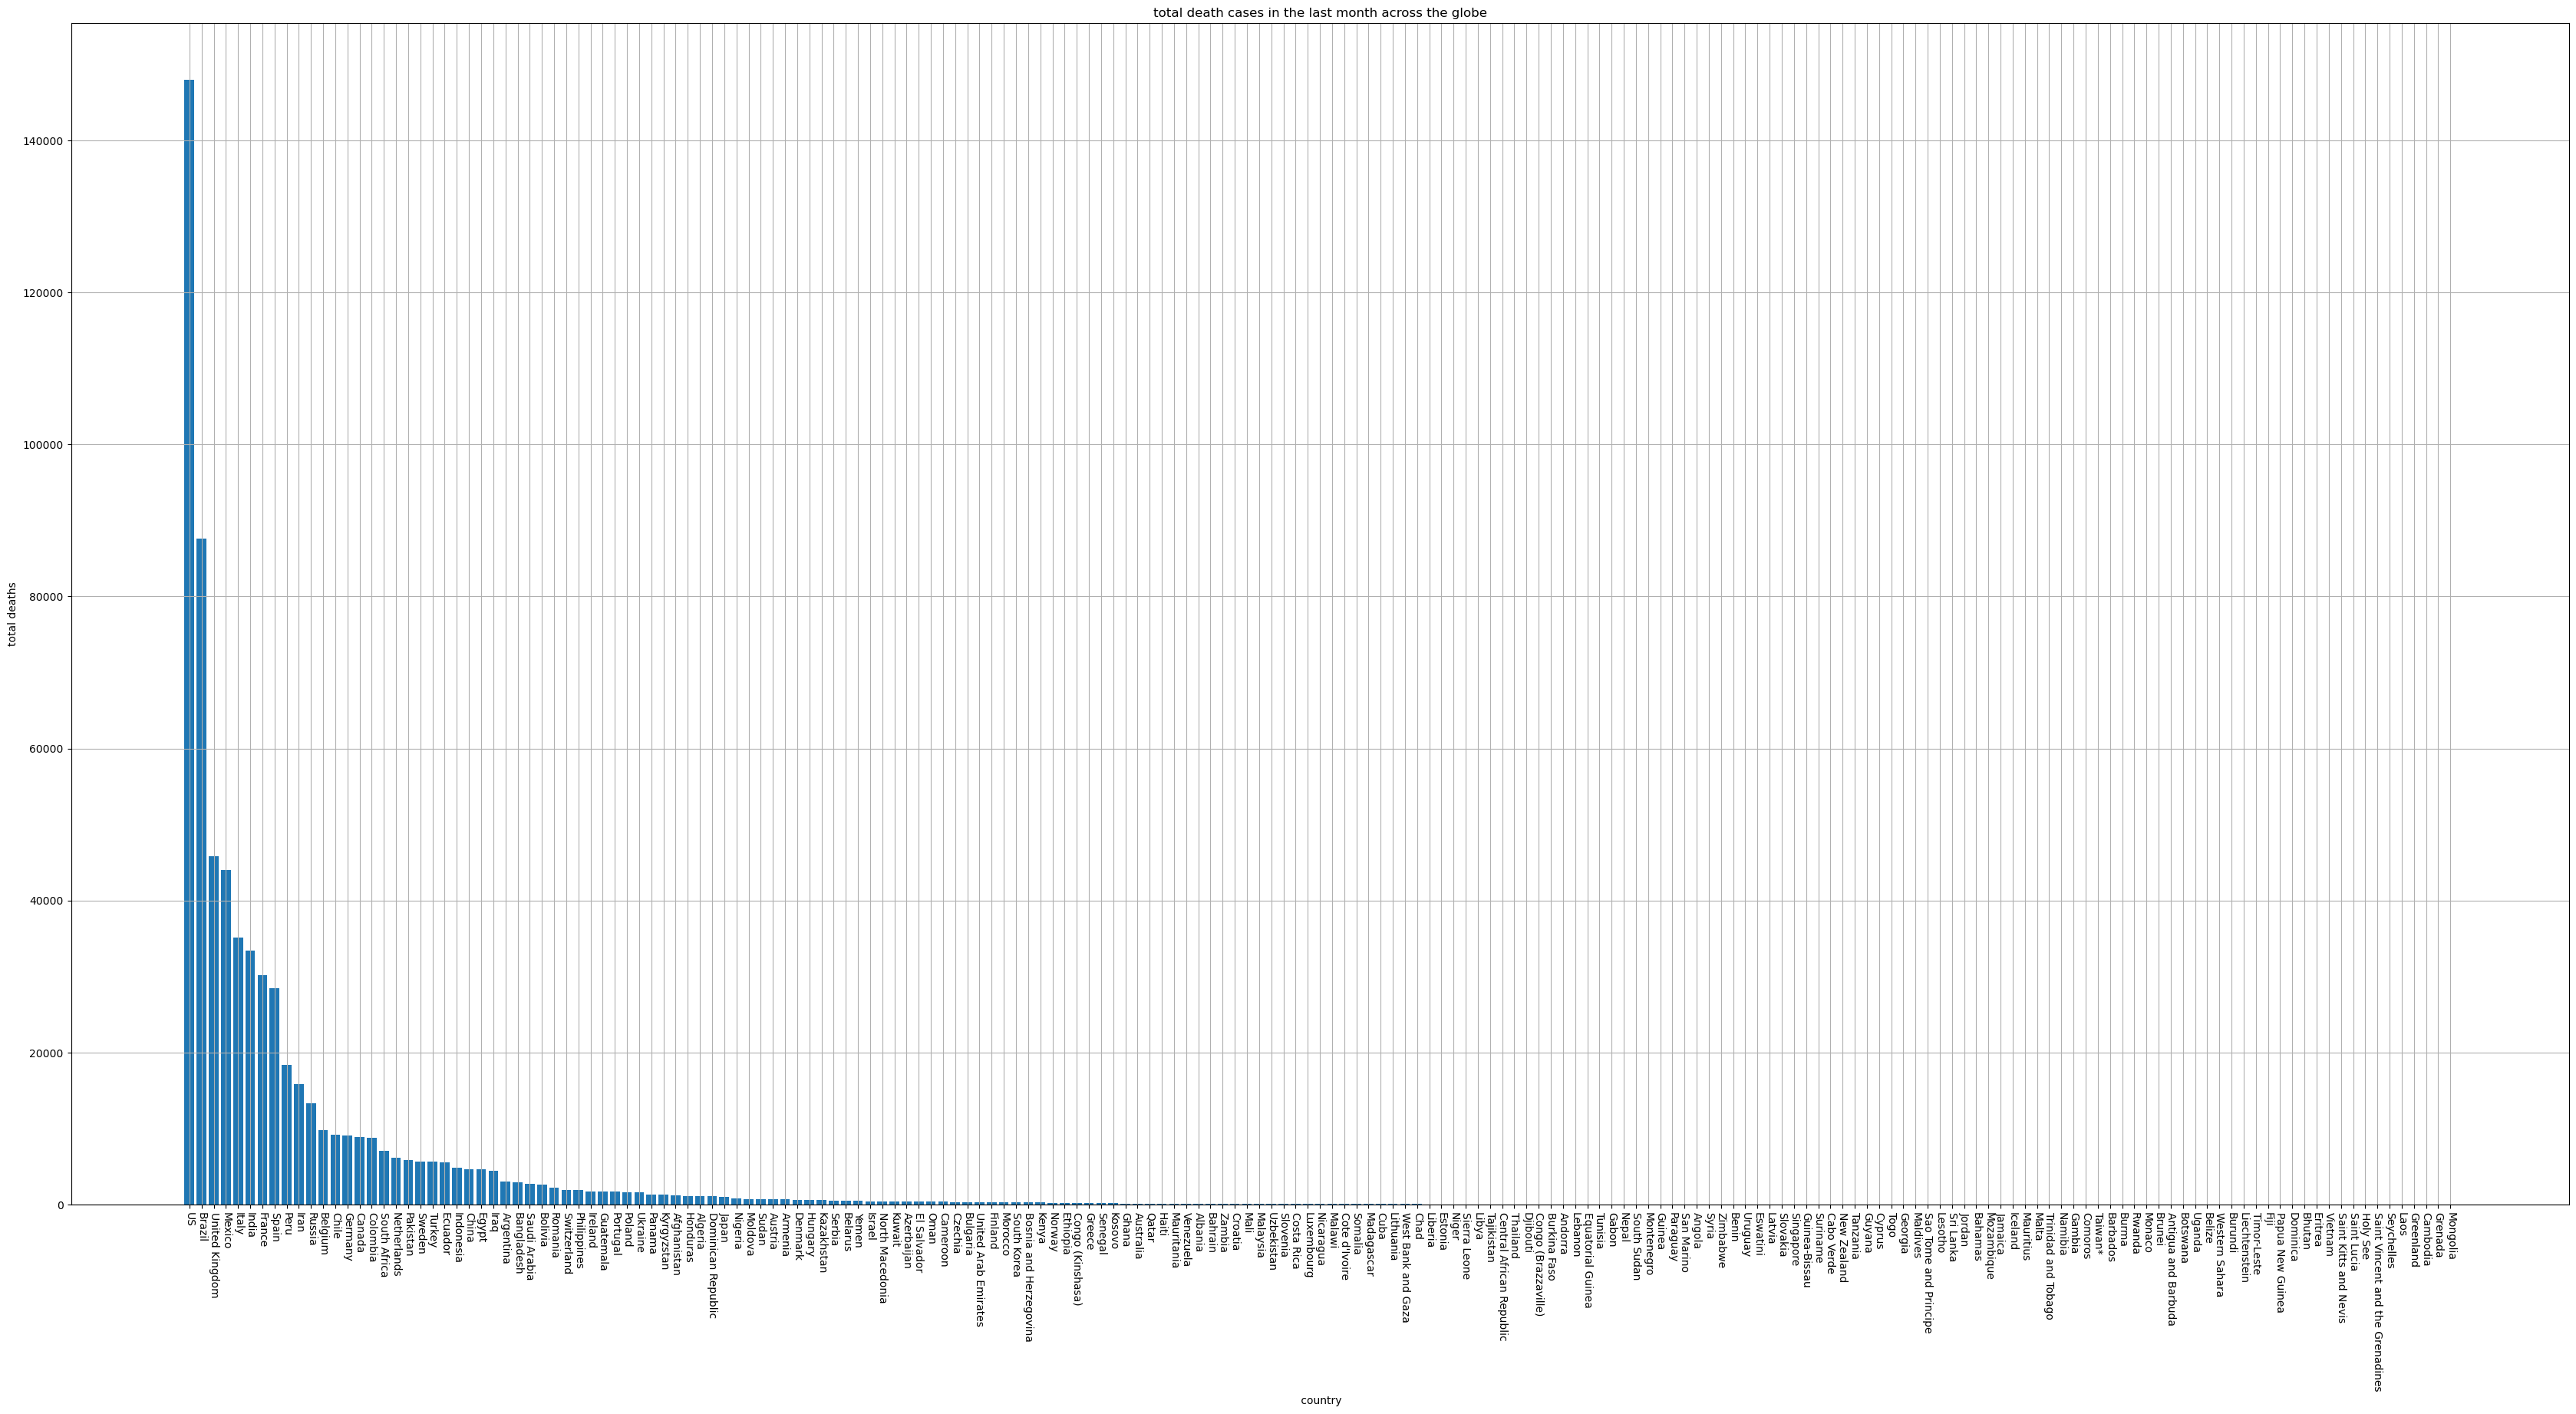

In [32]:
plt.figure(figsize=(42,20))
plt.bar(top_deaths['Country/Region'],top_deaths['deaths'])
plt.xlabel(' country')
plt.ylabel('total deaths')
plt.title('total death cases in the last month across the globe')
plt.xticks(rotation=270)
plt.grid(True)

plt.show()

In [33]:
# NUMBER OF PEOPLE RECOVERED
recovery = top.groupby(by="Country/Region")["recovered"].sum().sort_values(ascending=False).reset_index()
recovery

,Country/Region,recovered
0,Brazil,1846641
1,US,1325804
2,India,951166
3,Russia,602249
4,Chile,319954
...,...,...
182,Canada,0
183,Timor-Leste,0
184,Serbia,0
185,Syria,0


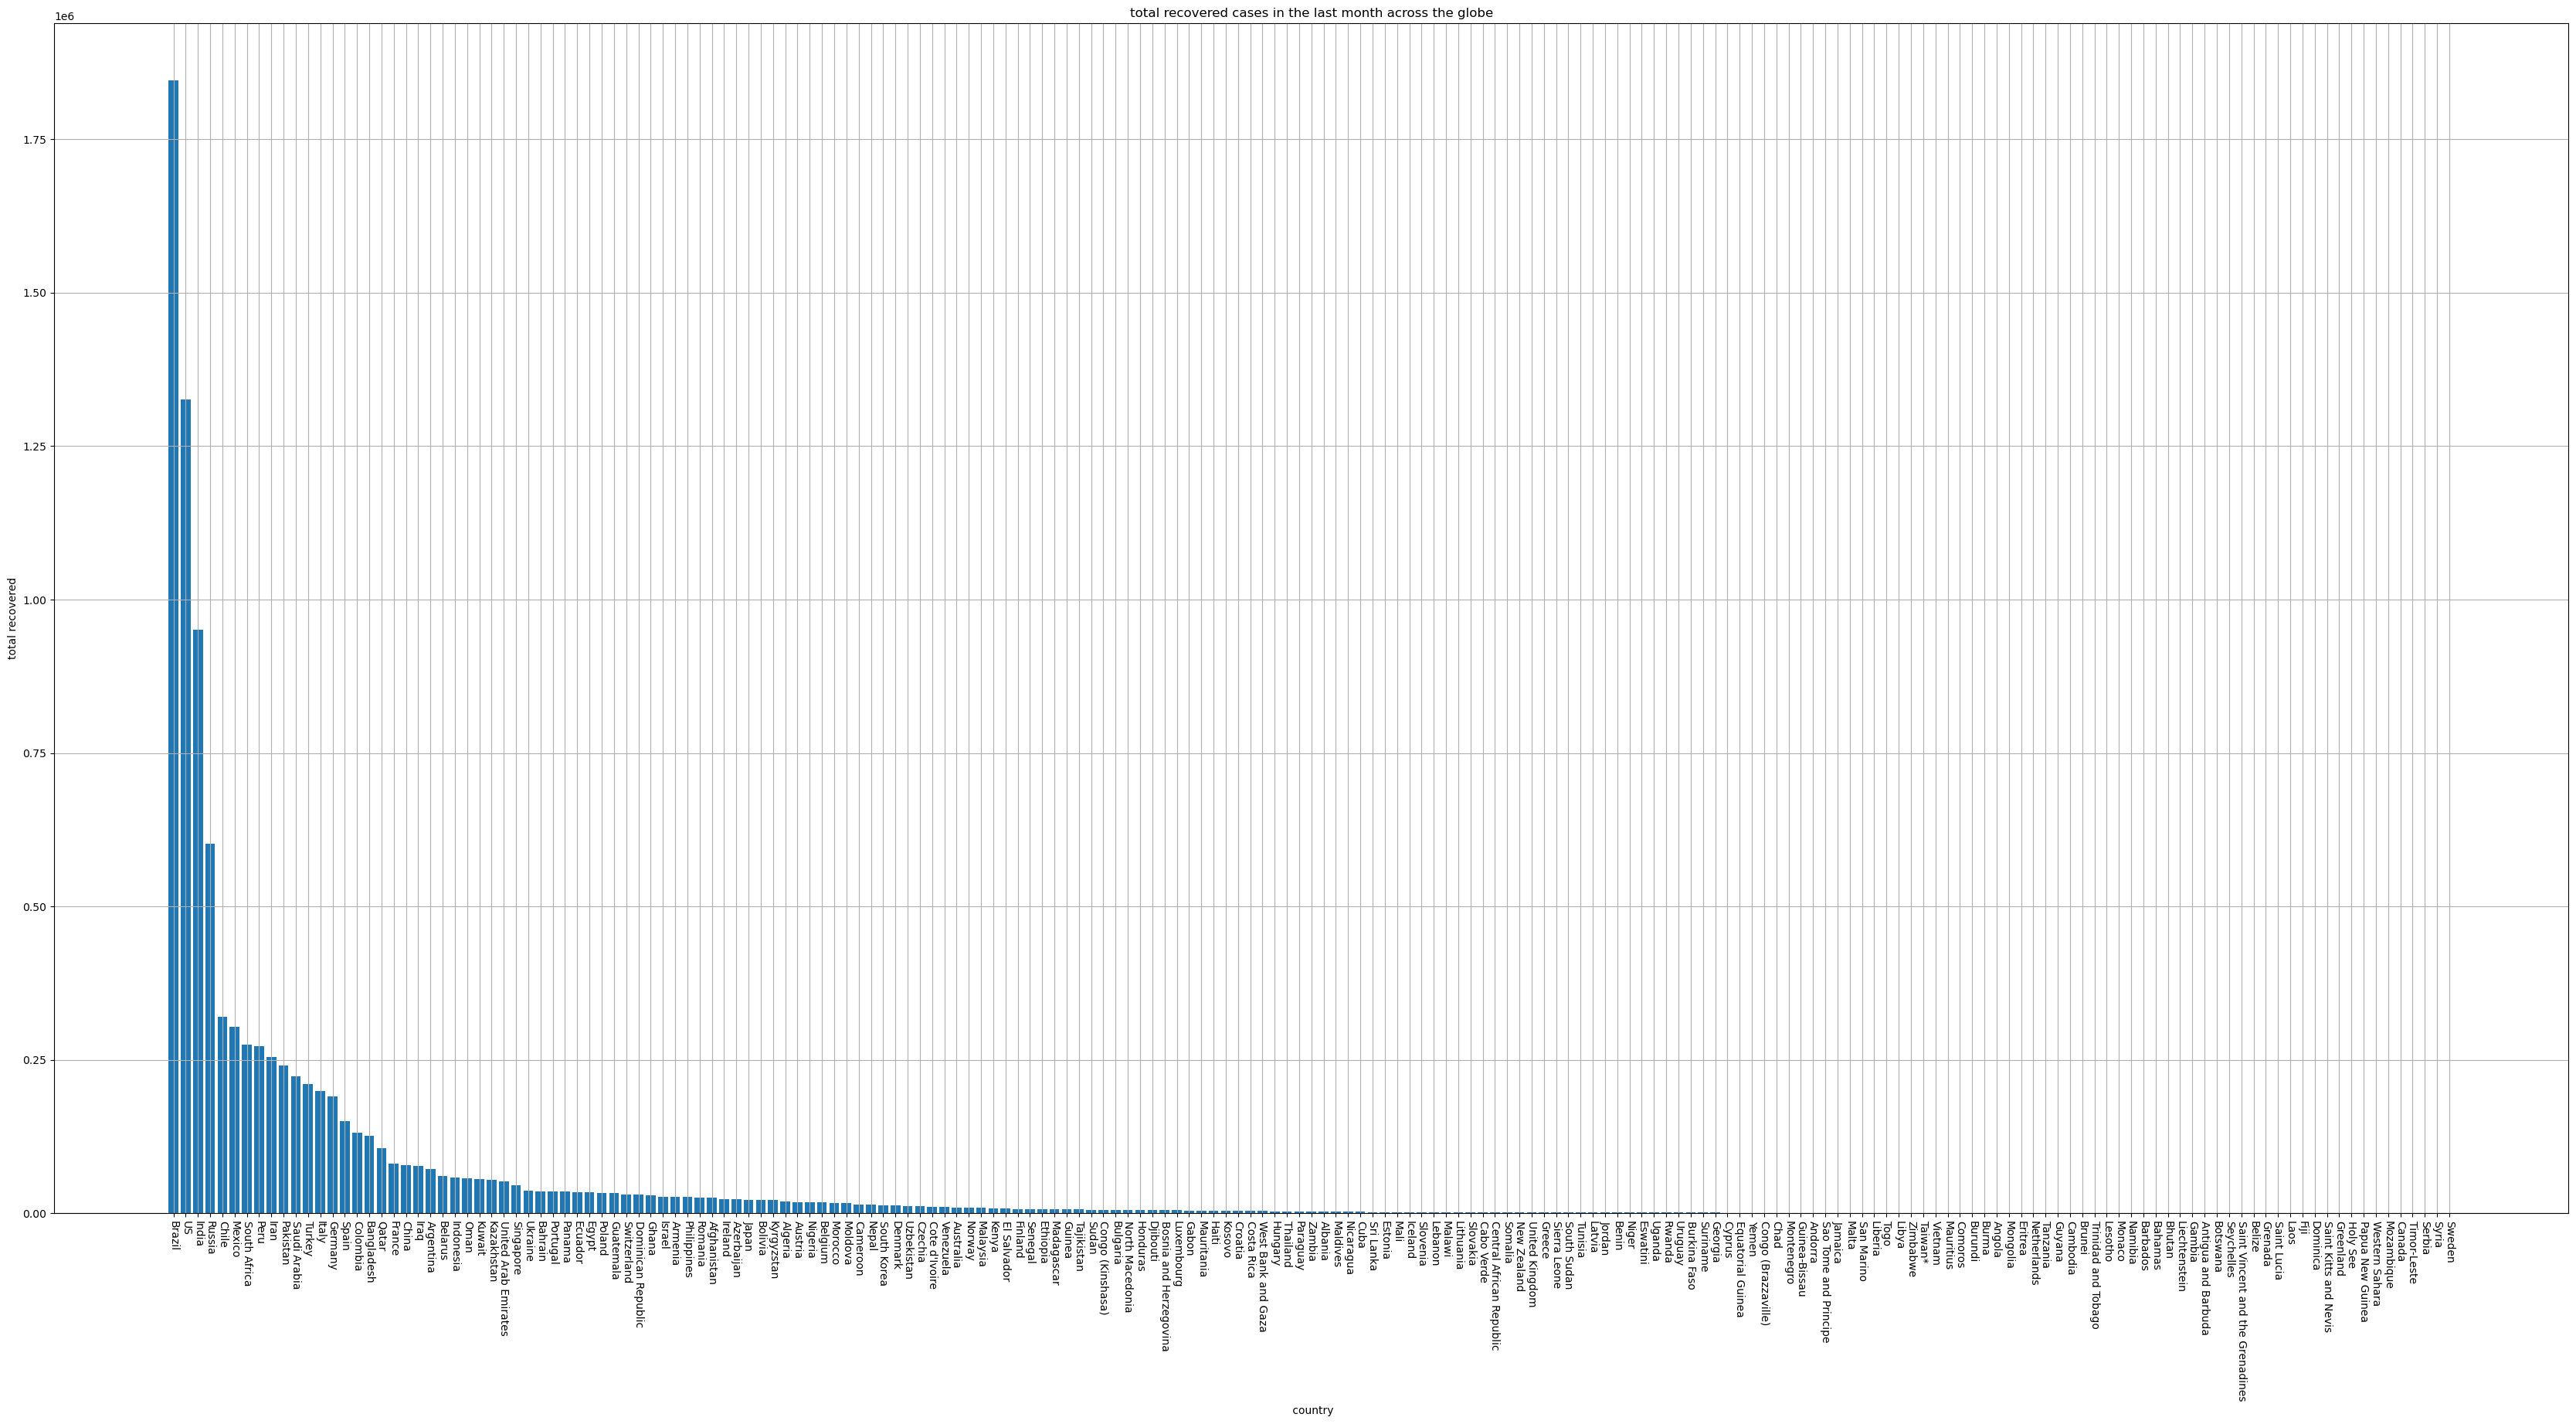

In [34]:
plt.figure(figsize=(42,20))
plt.bar(recovery['Country/Region'],recovery['recovered'])
plt.xlabel(' country')
plt.ylabel('total recovered')
plt.title('total recovered cases in the last month across the globe')
plt.xticks(rotation=270)
plt.grid(True)

plt.show()

## Taking the specific top countrie's data where covid spread the most according to data:

In [35]:
# US data specific from the start of 2020:
us = df[df['Country/Region'] == "US"]
us = us.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()
us

C:\Users\HP\AppData\Local\Temp\ipykernel_2600\3430126098.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  us = us.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()


,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,1,1
1,2020-01-23,0,0,1,1
2,2020-01-24,0,0,2,2
3,2020-01-25,0,0,2,2
4,2020-01-26,0,0,5,5
...,...,...,...,...,...
183,2020-07-23,1233269,144430,4038816,2661117
184,2020-07-24,1261624,145560,4112531,2705347
185,2020-07-25,1279414,146465,4178970,2753091
186,2020-07-26,1297863,146935,4233923,2789125


In [36]:
# Brazil data specific from the start of 2020:
brazil = df[df['Country/Region'] == "Brazil"]
brazil = brazil.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()
brazil


C:\Users\HP\AppData\Local\Temp\ipykernel_2600\3111179194.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  brazil = brazil.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()


,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1620313,84082,2287475,583080
184,2020-07-24,1693214,85238,2343366,564914
185,2020-07-25,1785359,86449,2394513,522705
186,2020-07-26,1812913,87004,2419091,519174


In [37]:
# India data specific from the start of 2020:
india = df[df['Country/Region'] == "India"]
india = india.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()
india


C:\Users\HP\AppData\Local\Temp\ipykernel_2600\3543531254.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  india = india.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()


,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,817209,30601,1288108,440298
184,2020-07-24,849432,31358,1337024,456234
185,2020-07-25,885573,32060,1385635,468002
186,2020-07-26,917568,32771,1435616,485277


In [38]:
# UK data specific from the start of 2020:
uk = df[df['Country/Region'] == "United Kingdom"]
uk = uk.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()
uk


C:\Users\HP\AppData\Local\Temp\ipykernel_2600\2370241514.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  uk = uk.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()


,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1425,45639,298731,251667
184,2020-07-24,1425,45762,299500,252313
185,2020-07-25,1427,45823,300270,253020
186,2020-07-26,1434,45837,301020,253749


In [39]:
# just checking the name of all countries:
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

In [40]:
# china data specific from the start of 2020:
china = df[df['Country/Region'] == "China"]
china = china.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()
china


C:\Users\HP\AppData\Local\Temp\ipykernel_2600\2796480508.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  china = china.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()


,date,recovered,deaths,confirmed,active
0,2020-01-22,28,17,548,503
1,2020-01-23,30,18,643,595
2,2020-01-24,36,26,920,858
3,2020-01-25,39,42,1406,1325
4,2020-01-26,49,56,2075,1970
...,...,...,...,...,...
183,2020-07-23,78701,4649,86045,2695
184,2020-07-24,78745,4650,86202,2807
185,2020-07-25,78813,4652,86381,2916
186,2020-07-26,78862,4652,86570,3056


In [41]:
# russia data specific from the start of 2020:
russia = df[df['Country/Region'] == "Russia"]
russia = russia.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()
russia


C:\Users\HP\AppData\Local\Temp\ipykernel_2600\342631810.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  russia = russia.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()


,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,579295,12873,793720,201552
184,2020-07-24,587728,13026,799499,198745
185,2020-07-25,596064,13172,805332,196096
186,2020-07-26,599172,13249,811073,198652


## Comparing the confirmed cases between these 6 countries/ regions:

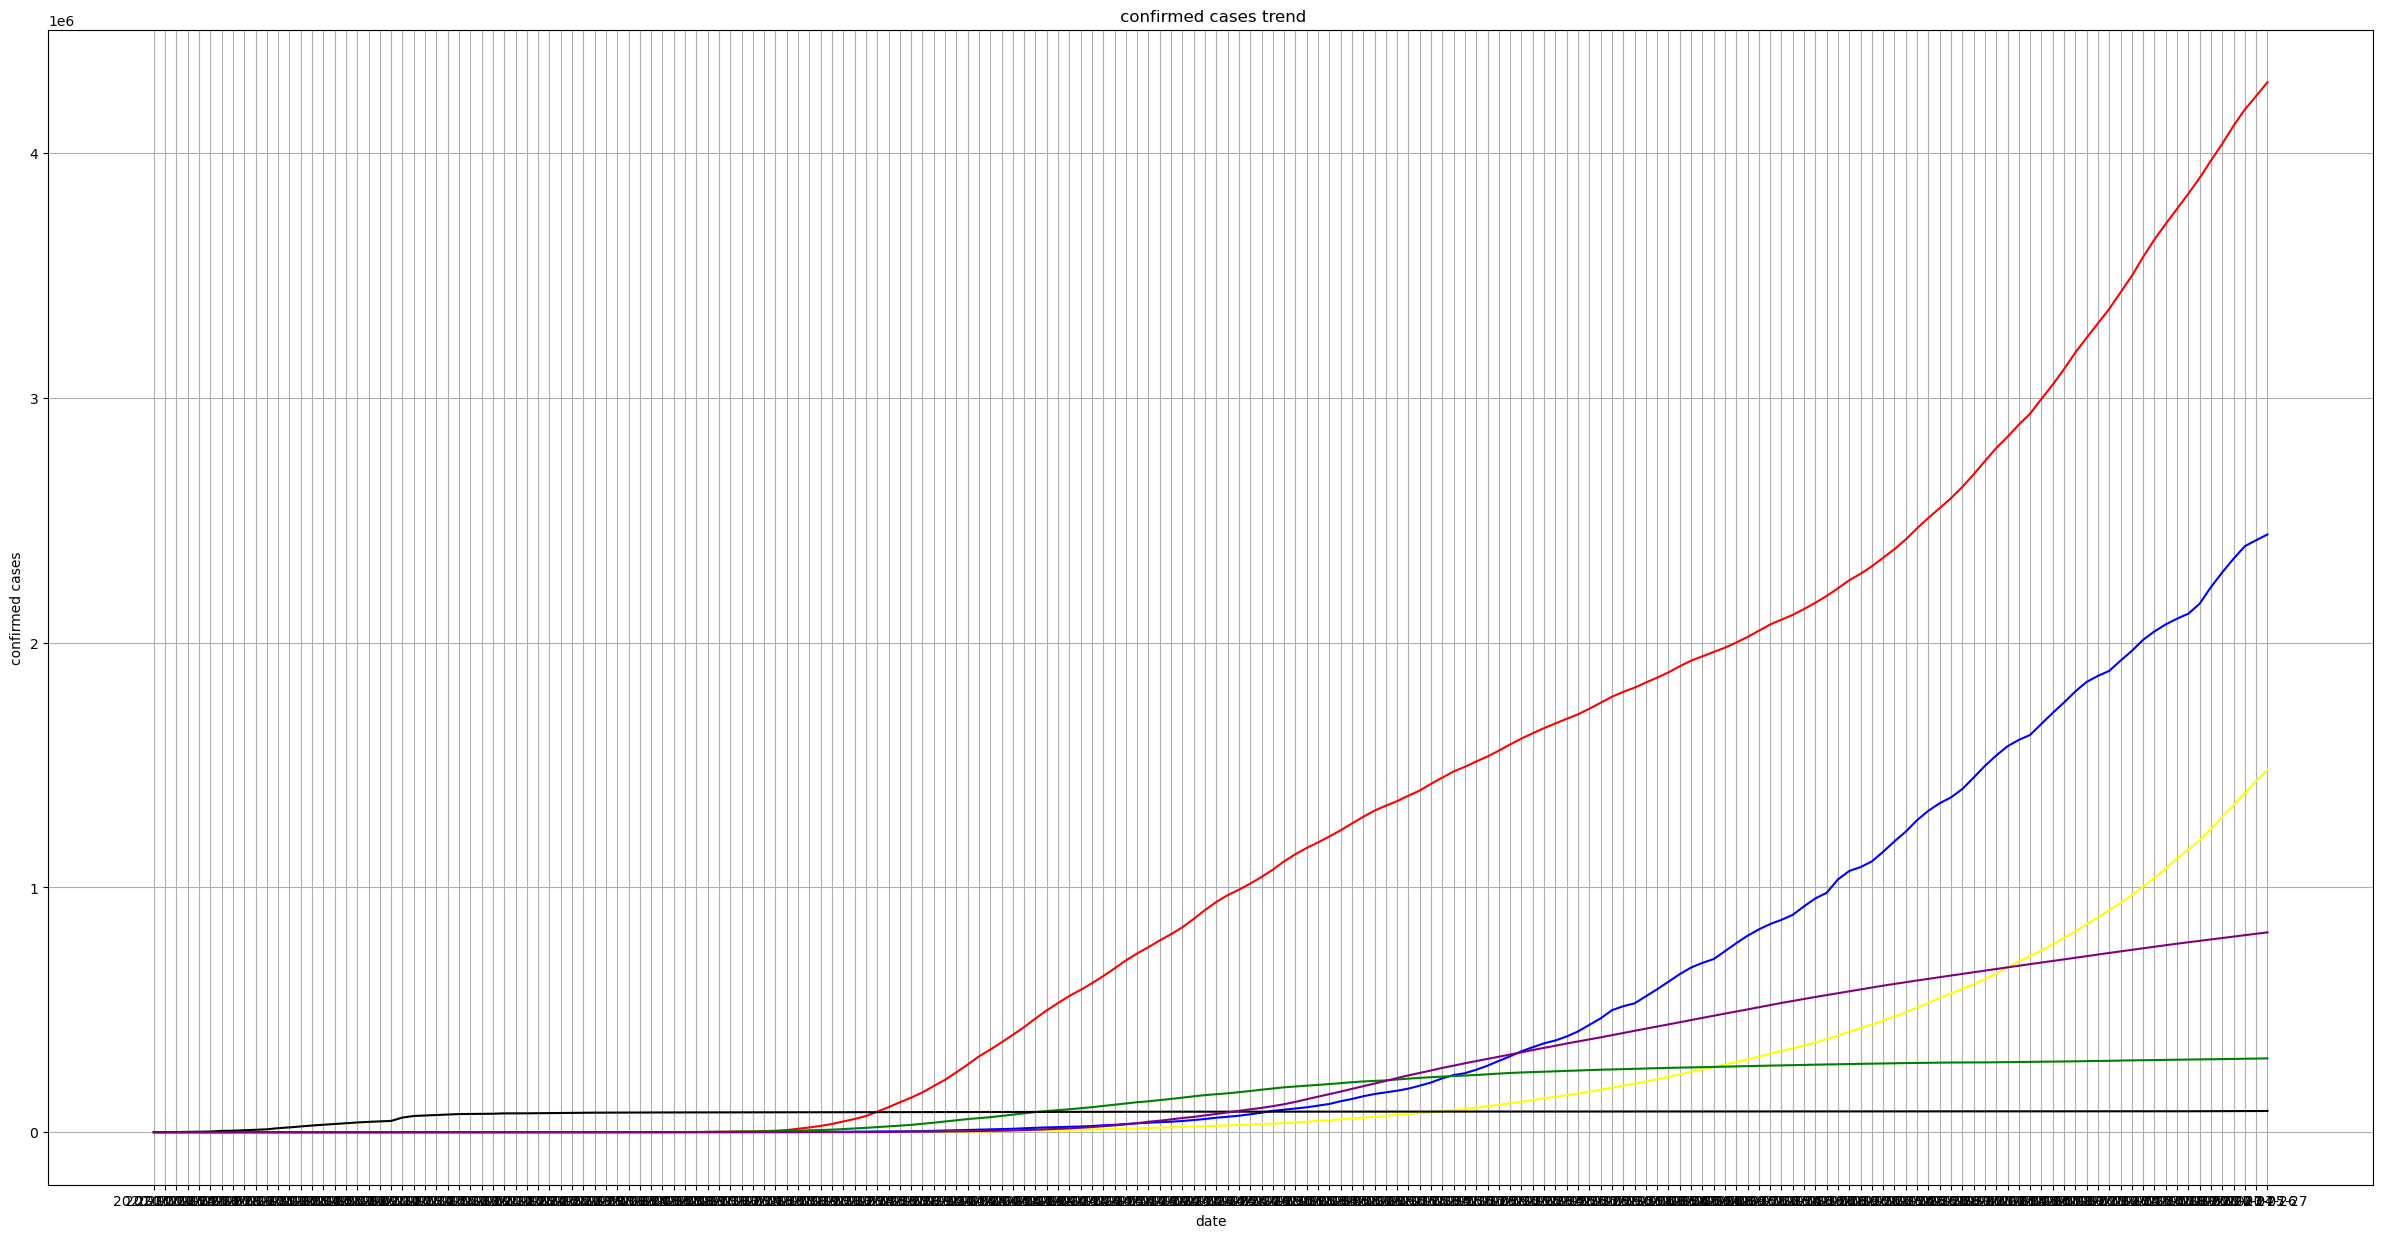

In [51]:

plt.figure(figsize=(30,15))
plt.plot(us['date'],us['confirmed'],'red')
plt.plot(brazil['date'],brazil['confirmed'],'blue')
plt.plot(india['date'],india['confirmed'],'yellow')
plt.plot(uk['date'],uk['confirmed'],'green')
plt.plot(china['date'],china['confirmed'],'black')
plt.plot(russia['date'],russia['confirmed'],'purple')
plt.xlabel('date')
plt.ylabel('confirmed cases')
plt.title(' confirmed cases trend')
plt.grid(True)

plt.show()


# 1st conclusion: US is having the highest number of confirmed cases and the rate of increase of confirmed cases in US is also higher by a significant margin than other top confirmed rate countiries.

## Comparing the death cases between these 6 countries/ regions:

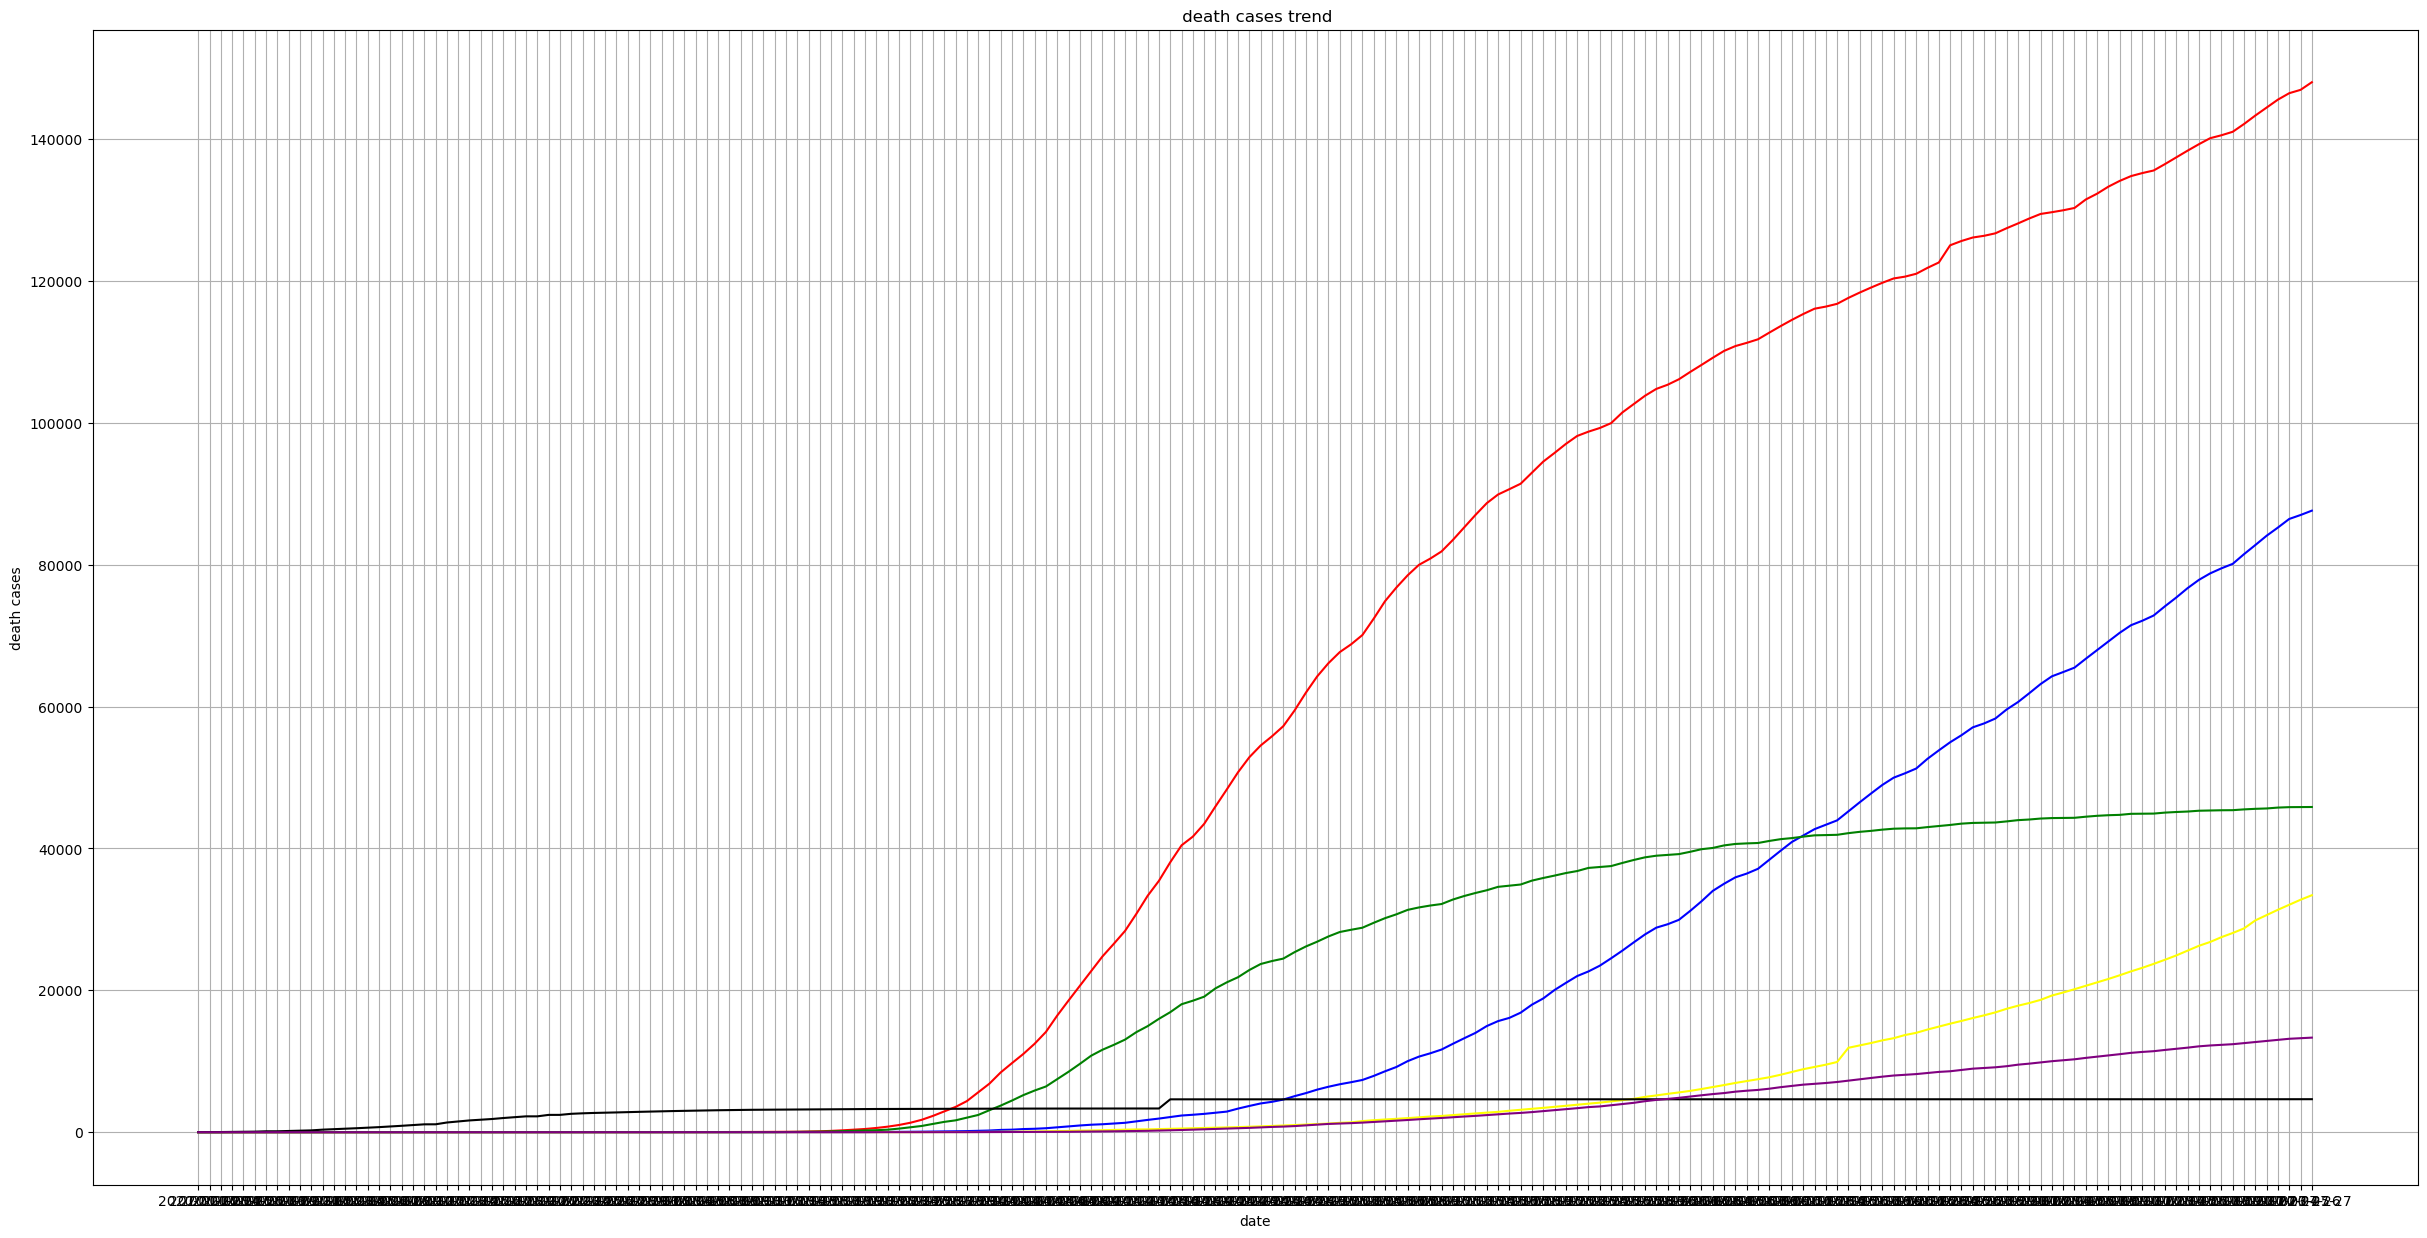

In [52]:

plt.figure(figsize=(30,15))
plt.plot(us['date'],us['deaths'],'red')
plt.plot(brazil['date'],brazil['deaths'],'blue')
plt.plot(india['date'],india['deaths'],'yellow')
plt.plot(uk['date'],uk['deaths'],'green')
plt.plot(china['date'],china['deaths'],'black')
plt.plot(russia['date'],russia['deaths'],'purple')
plt.xlabel('date')
plt.ylabel('death cases')
plt.title(' death cases trend')
plt.grid(True)

plt.show() 


## 2nd Conclusion: Again US is having the highest deaths and the highest death rate also among other countries. But, unlike the confirmed cases.... US death rates are increasing but at a decreasing rate and same with UK. All other countries deaths are increasing at an increasing rate (exponentially).

## Comparing the active cases between these 6 countries/ regions:

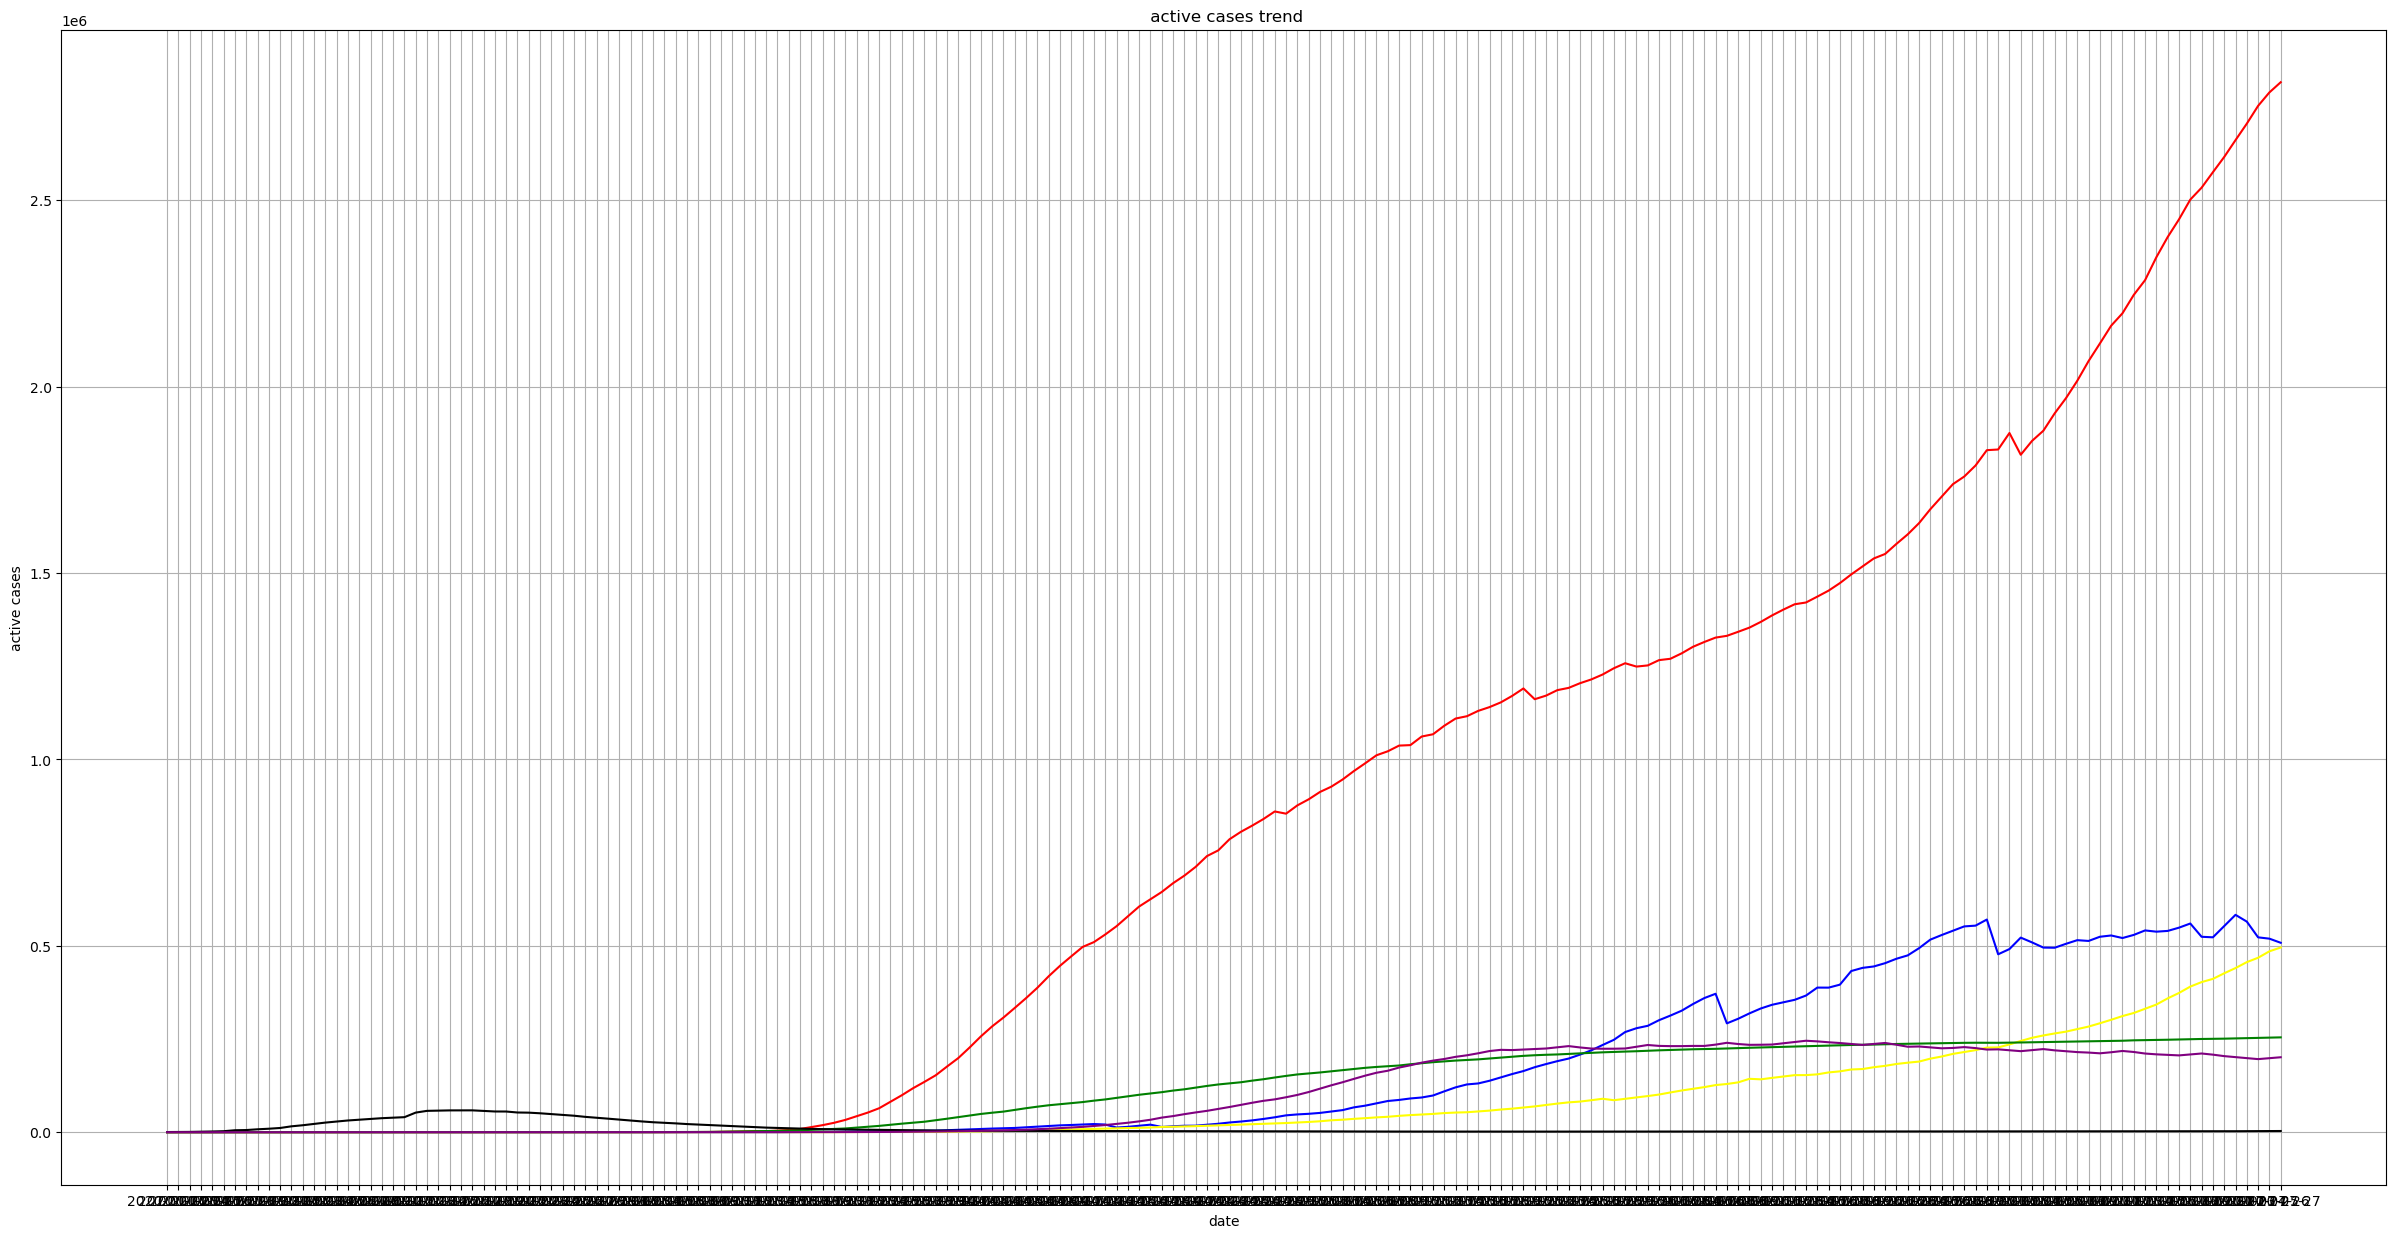

In [53]:

plt.figure(figsize=(30,15))
plt.plot(us['date'],us['active'],'red')
plt.plot(brazil['date'],brazil['active'],'blue')
plt.plot(india['date'],india['active'],'yellow')
plt.plot(uk['date'],uk['active'],'green')
plt.plot(china['date'],china['active'],'black')
plt.plot(russia['date'],russia['active'],'purple')
plt.xlabel('date')
plt.ylabel('active cases')
plt.title(' active cases trend')
plt.grid(True)

plt.show()


# 3rd conclusion: Again US is topping the number of active cases, and the rate is initially increasing at a decreasing rate, but towards the end of the year the rate changed and started increasing at an increasing rate. UK and russia is showing a trend of increasing at a decreasing rate and then after a point of time (roughly around the same time when US active rates took an exponential turn) decreasing. India and brazil are throughout following a more or less exponential trend ( increasing at an increasing rate).

## Comparing the recovered cases between these 6 countries/ regions:

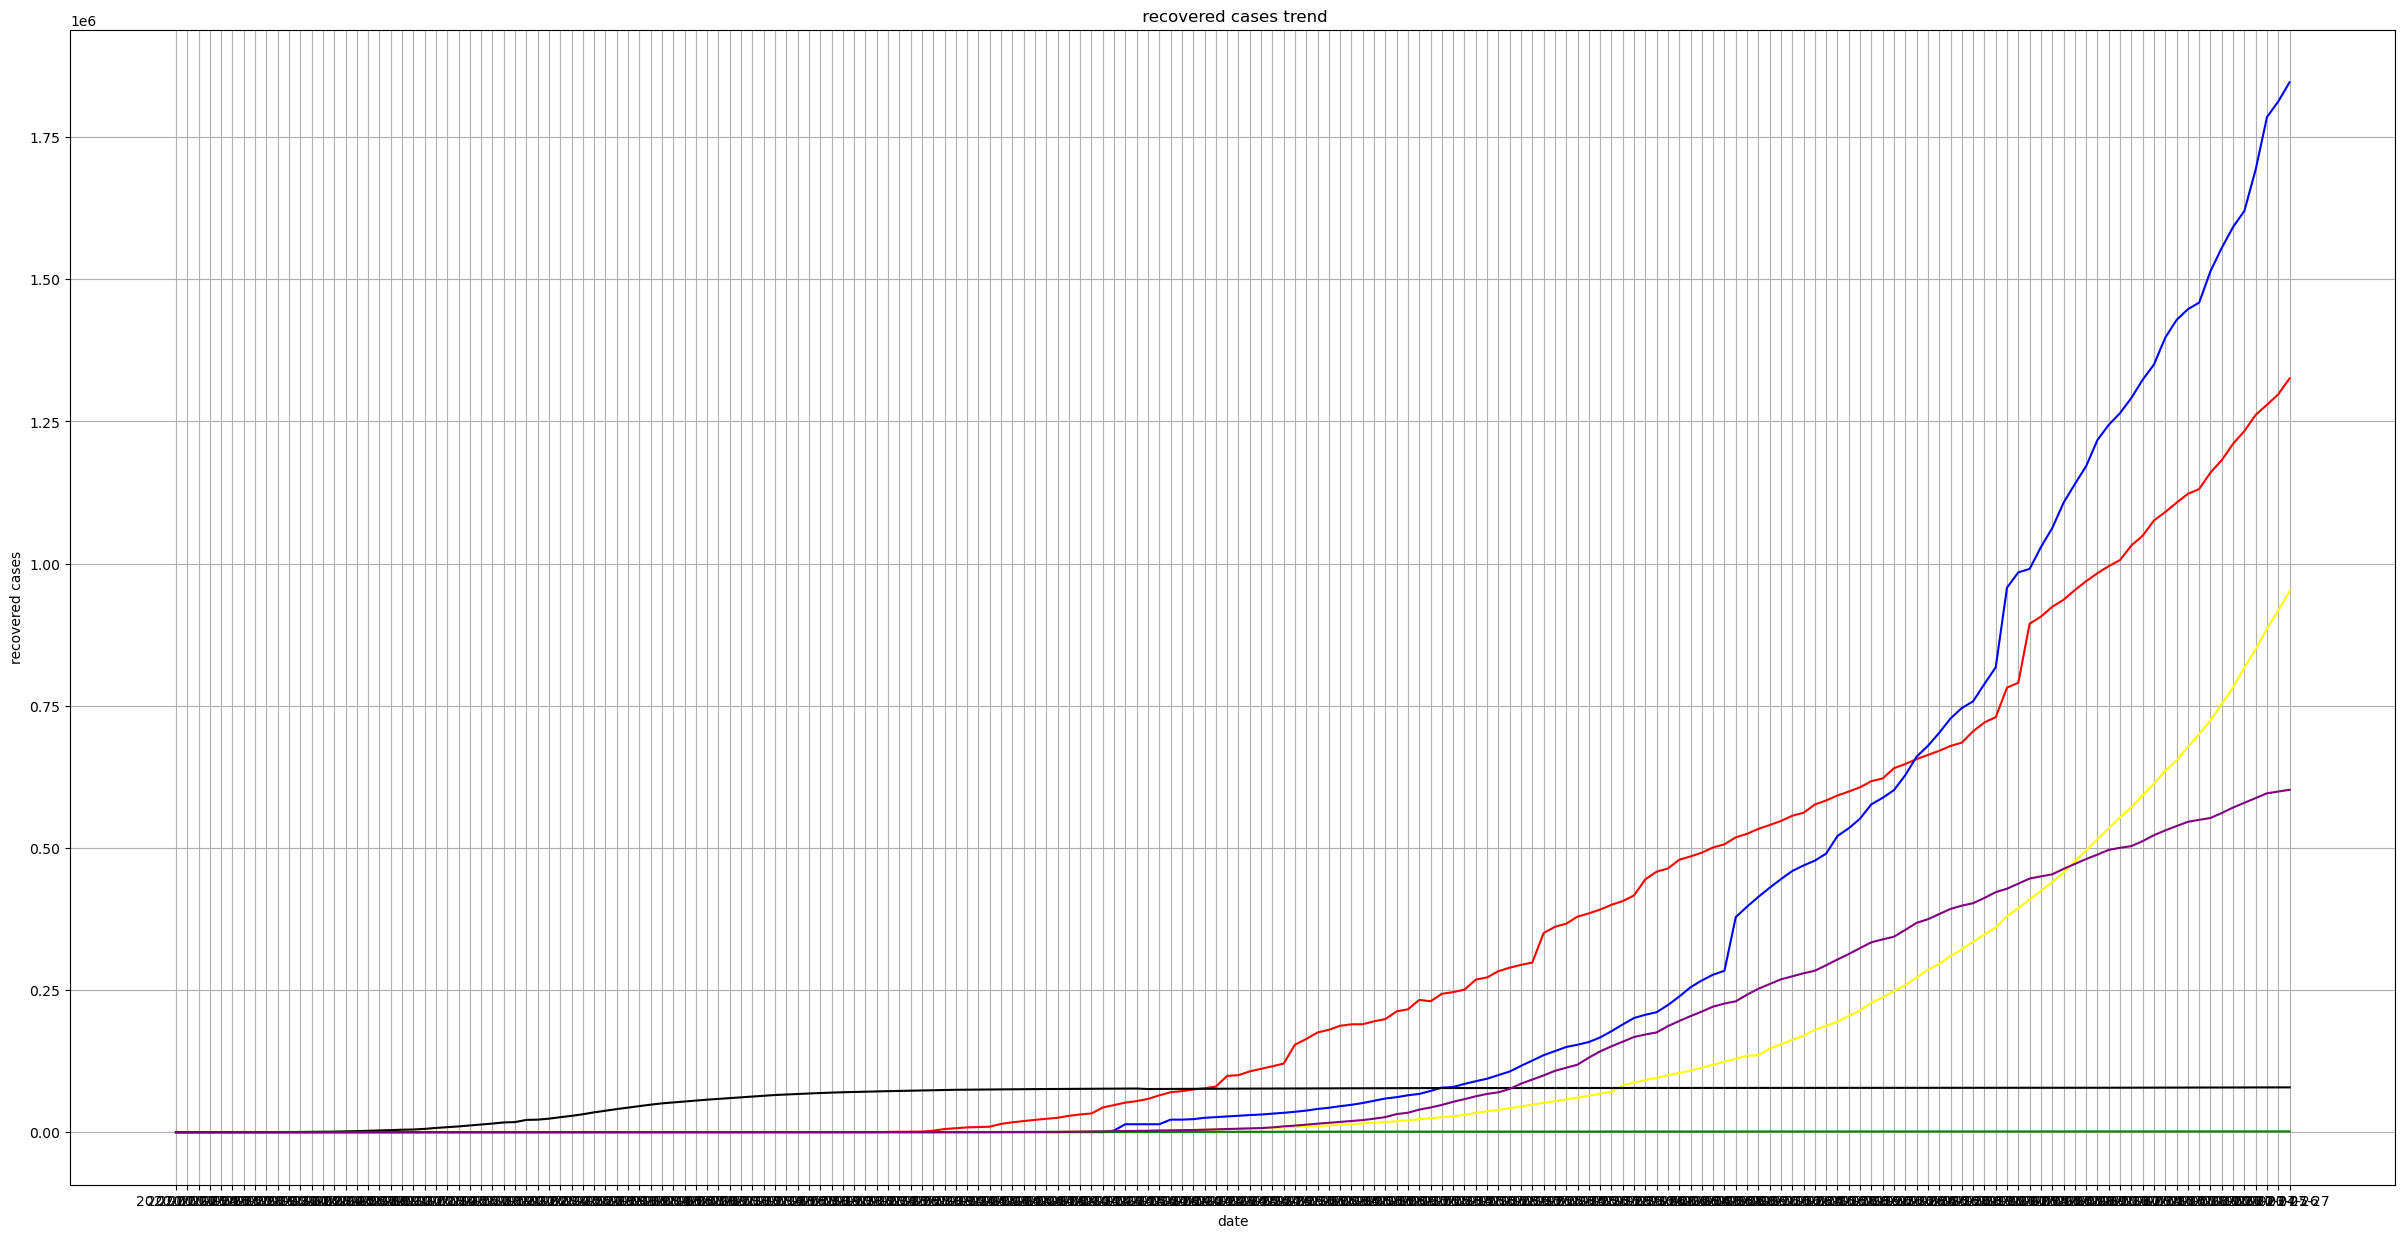

In [54]:

plt.figure(figsize=(30,15))
plt.plot(us['date'],us['recovered'],'red')
plt.plot(brazil['date'],brazil['recovered'],'blue')
plt.plot(india['date'],india['recovered'],'yellow')
plt.plot(uk['date'],uk['recovered'],'green')
plt.plot(china['date'],china['recovered'],'black')
plt.plot(russia['date'],russia['recovered'],'purple')
plt.xlabel('date')
plt.ylabel('recovered cases')
plt.title(' recovered cases trend')
plt.grid(True)

plt.show()


# 4th conclusion:  Recovery rate of all countries  more or less is following an exponential growth pattern, except that of uk, uk recovery rate is almost 0 throughout. And that makes sense, confirmed cases are so less in uk but death rate is so high...so that obviously means almost all the people who got affected by covid actually ended up dying in uk.

## Time-series modelling using facebook-prophet library on this covid dataset:

In [55]:
pip install prophet #installed fbprophet library in jupyter.

     ---------------------------------------- 12.9/12.9 MB 6.0 MB/s eta 0:00:00
     -------------------------------------- 754.3/754.3 kB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 47.9/47.9 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 83.2/83.2 kB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.4/1.4 MB 4.3 MB/s eta 0:00:00
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732001 sha256=11859c3cd2836c8acdcc83a91af7d0806dcff9432591886182b8e87b7d55008f
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\04\1f\e5\8dd0c661cd8d252817655dc14a84f7ae045d6616594145aa81
Successfully built pymeeus
Note: you may need to restart the kernel to use updated packages.


In [57]:
from prophet import Prophet # importing the model from this prophet library for modelling

In [58]:
df

,province,Country/Region,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [59]:
df['date']=pd.to_datetime(df['date']) #converting the date column to date-time format

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   province        14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   lat             49068 non-null  float64       
 3   long            49068 non-null  float64       
 4   date            49068 non-null  datetime64[ns]
 5   confirmed       49068 non-null  int64         
 6   deaths          49068 non-null  int64         
 7   recovered       49068 non-null  int64         
 8   active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [65]:
df['date'].max()

Timestamp('2020-07-27 00:00:00')

In [66]:
# seeing total active cases in 2020:
df['active'].sum()

396715350

## Making the data-set time series modelling friendly, because Prophet is basically a time-series model :

In [67]:
confirmed= df.groupby('date')['confirmed'].sum()

In [68]:
confirmed

date
2020-01-22         555
2020-01-23         654
2020-01-24         941
2020-01-25        1434
2020-01-26        2118
                ...   
2020-07-23    15510481
2020-07-24    15791645
2020-07-25    16047190
2020-07-26    16251796
2020-07-27    16480485
Name: confirmed, Length: 188, dtype: int64

In [73]:
confirmed=pd.DataFrame(confirmed).reset_index()

In [74]:
confirmed.head()

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [75]:
deaths= df.groupby('date')['deaths'].sum()

In [76]:
deaths=pd.DataFrame(deaths).reset_index()

In [78]:
deaths.head()

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [79]:
recovered= df.groupby('date')['recovered'].sum()

In [80]:
recovered=pd.DataFrame(recovered).reset_index()

In [81]:
recovered.head()

,date,recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


## For buildign a forecasting model using fbprophet library
## there should be only 2 columns passed.
## The column names should always be ---> 'ds','y' .


#  

# Confirmed cases prediction for next 1 week :

In [85]:
confirmed.columns=['ds','y'] # changing the column names of confirmed data-set to fit it into the prophet model.

In [86]:
confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [87]:
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [90]:
m= Prophet()

In [91]:
m.fit(confirmed)

16:54:57 - cmdstanpy - INFO - Chain [1] start processing
16:54:57 - cmdstanpy - INFO - Chain [1] done processing


In [94]:
future=m.make_future_dataframe(periods=7)

In [98]:
future.tail(7)

,ds
188,2020-07-28
189,2020-07-29
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [103]:
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [96]:
confirmed.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [100]:
forecast=m.predict(future) # Actual y  forecast  for the next 7 periods.

In [101]:
forecast.tail(7)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
188,2020-07-28,1.633695e+07,1.621743e+07,1.642597e+07,1.633695e+07,1.633695e+07,-16863.703632,-16863.703632,-16863.703632,-16863.703632,-16863.703632,-16863.703632,0.0,0.0,0.0,1.632008e+07
189,2020-07-29,1.654096e+07,1.642778e+07,1.663560e+07,1.653960e+07,1.654231e+07,-10997.897085,-10997.897085,-10997.897085,-10997.897085,-10997.897085,-10997.897085,0.0,0.0,0.0,1.652996e+07
190,2020-07-30,1.674497e+07,1.664508e+07,1.685575e+07,1.673994e+07,1.674999e+07,-1101.108996,-1101.108996,-1101.108996,-1101.108996,-1101.108996,-1101.108996,0.0,0.0,0.0,1.674387e+07
191,2020-07-31,1.694898e+07,1.685232e+07,1.706253e+07,1.693731e+07,1.696013e+07,10060.657719,10060.657719,10060.657719,10060.657719,10060.657719,10060.657719,0.0,0.0,0.0,1.695904e+07
192,2020-08-01,1.715300e+07,1.705643e+07,1.728029e+07,1.713239e+07,1.717142e+07,13739.103217,13739.103217,13739.103217,13739.103217,13739.103217,13739.103217,0.0,0.0,0.0,1.716673e+07
193,2020-08-02,1.735701e+07,1.725341e+07,1.748891e+07,1.732558e+07,1.738368e+07,7272.359551,7272.359551,7272.359551,7272.359551,7272.359551,7272.359551,0.0,0.0,0.0,1.736428e+07
194,2020-08-03,1.756102e+07,1.744604e+07,1.767351e+07,1.751916e+07,1.759773e+07,-2109.410773,-2109.410773,-2109.410773,-2109.410773,-2109.410773,-2109.410773,0.0,0.0,0.0,1.755891e+07


## Plotting the covid-19 time-series and it's forecast:

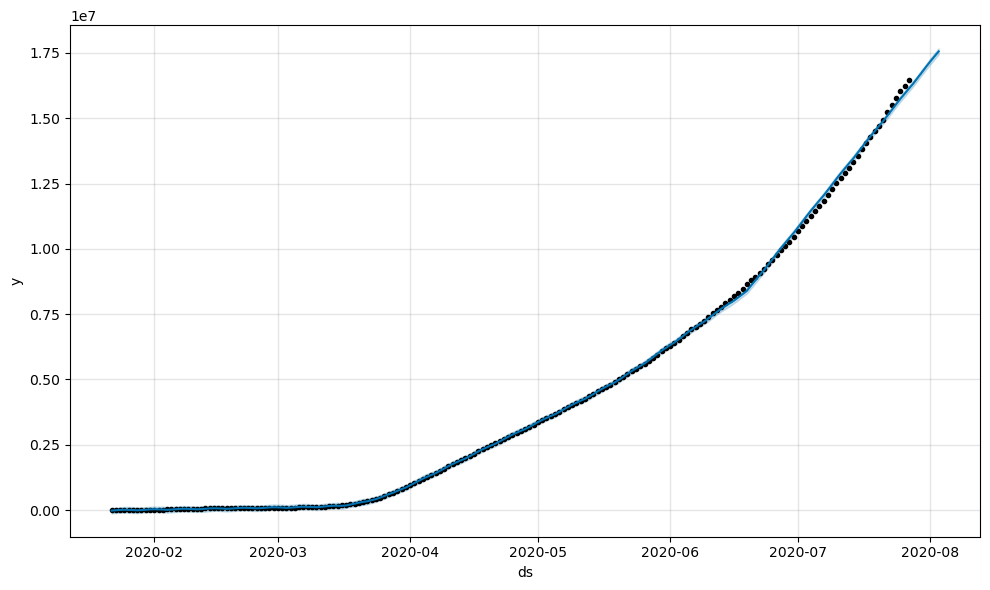

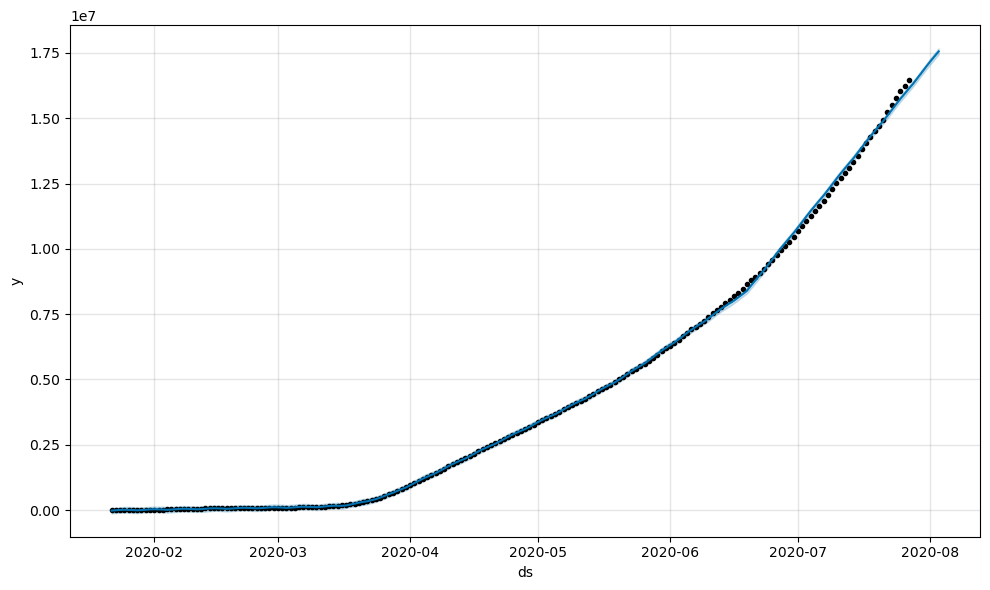

In [104]:

m.plot(forecast) # The extended blue graph is the forecast of the next 7 periods by the prophet model(T.S).

## Plotting the components of a time-series data using prophet :

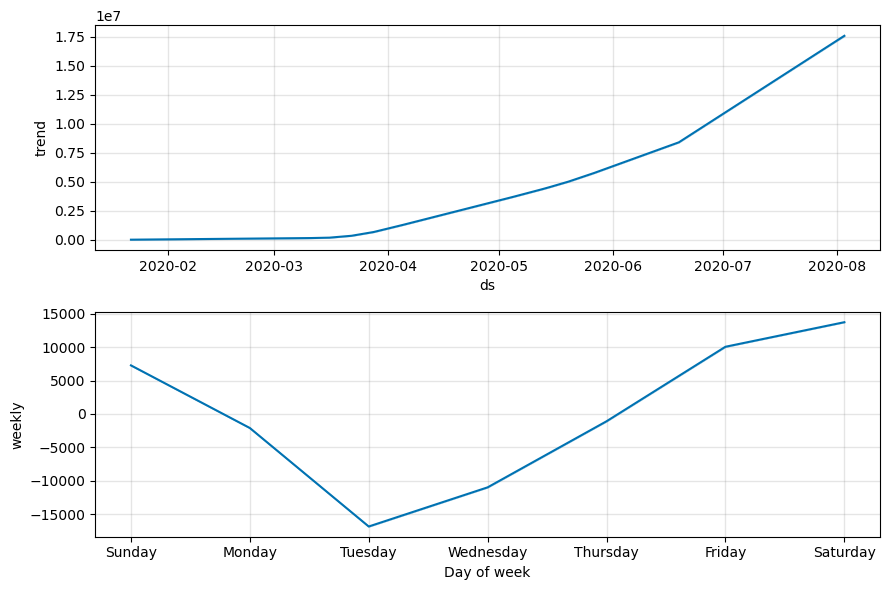

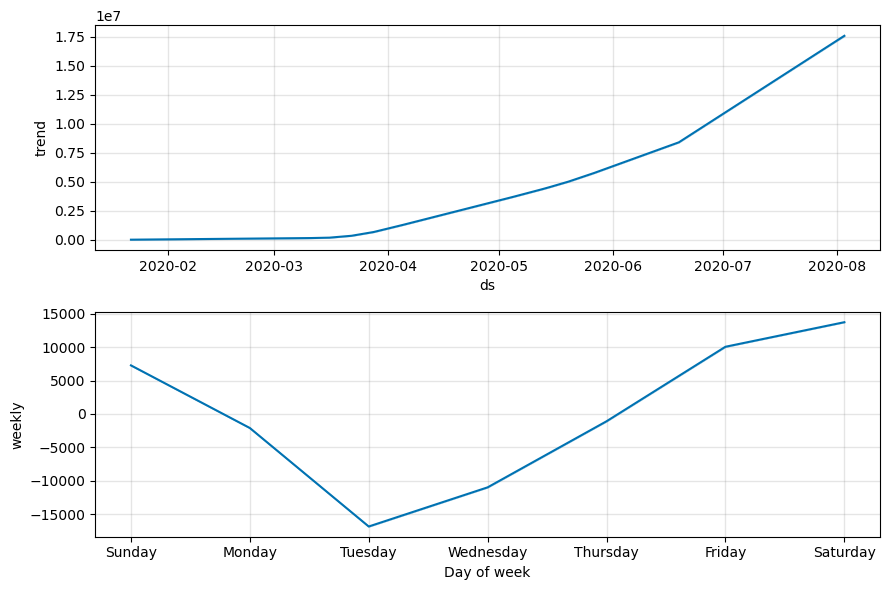

In [105]:
m.plot_components(forecast)